<a href="https://colab.research.google.com/github/Dimas0824/Machine_Learning/blob/main/Kuis_1/Kuis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Muhammad Irsyad Dimas Abdillah <br>
NIM: 2341720088 <br>
Kelas: TI-3H <br>
Absen: 20 <br>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [50]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [52]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [78]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [79]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
# Data Size
df.shape

(48842, 15)

In [81]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [82]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.shape

df.info()
#menampilkan jumlah data hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


Jumlah variable yang hilang ada 3 variable (workclass, occupation, native-country) dan jumlah data hilang dari ketiga variable tersebut adalah 2203

In [83]:
print("Jumlah data hilang:", df.isnull().sum().sum())

Jumlah data hilang: 2203


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [84]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#lakukan perulangan untuk mengganti keseluruhan data yang hilang dengan menggunakan modus
for col in ['workclass', 'occupation', 'native-country']:
  df[col].fillna(df[col].mode()[0], inplace=True)

#cek apakah masih ada data hilang
print("Jumlah data hilang setelah imputasi:", df.isnull().sum().sum())
print(df.isnull().sum())

Jumlah data hilang setelah imputasi: 0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-890915854.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [85]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. Ambil kolom kualitatif
kol_kuali = df.select_dtypes(include=['object']).columns
print("Kolom kualitatif: " , kol_kuali.to_list())

# 2. Cek value unik sebelum cleaning
for col in kol_kuali:
    print(f"\nValue unik di {col} sebelum cleaning")
    print(df[col].unique())

# 3. Cleaning data kategorikal

# a. ganti tanda '?' dengan "Others"
df['workclass'] = df['workclass'].replace('?', 'Others')
df['occupation'] = df['occupation'].replace('?', 'Others')
df['native-country'] = df['native-country'].replace('?', 'Others')

# b. gabungkan duplikat di income (hilangkan titik)
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# c. perbaiki kesalahan penulisan di native-country
df['native-country'] = df['native-country'].replace({
    "Columbia": "Colombia",
    "Holand-Netherlands": "Netherlands",
    "Trinadad&Tobago": "Trinidad&Tobago",
    "Hong": "Hong-Kong"
})

# 4. Cek ulang Value setelah cleaning data
for col in ["workclass", "occupation", "native-country", "income", "education"]:
    print(f"\nValue unik di {col}")
    print(df[col].unique())

Kolom kualitatif:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

Value unik di workclass sebelum cleaning
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Value unik di education sebelum cleaning
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Value unik di marital-status sebelum cleaning
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Value unik di occupation sebelum cleaning
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Value unik di relationship sebelum cleani

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

In [87]:
#import dependencies
import matplotlib.pyplot as plt

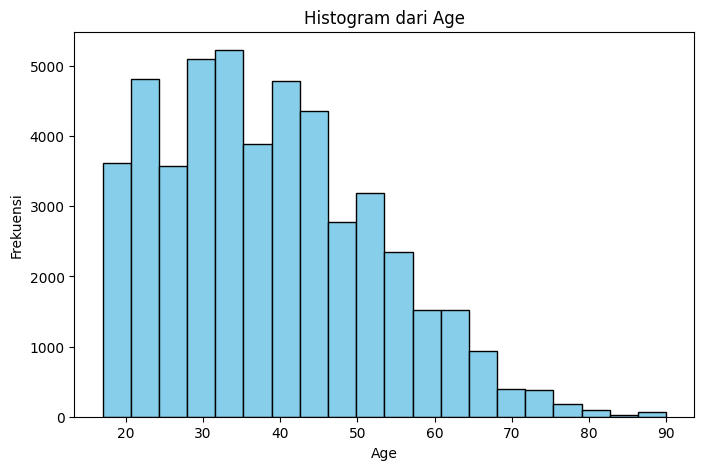

In [91]:
# Jawab 1.1 - Histrogram
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.title('Histogram dari Age')
plt.show()


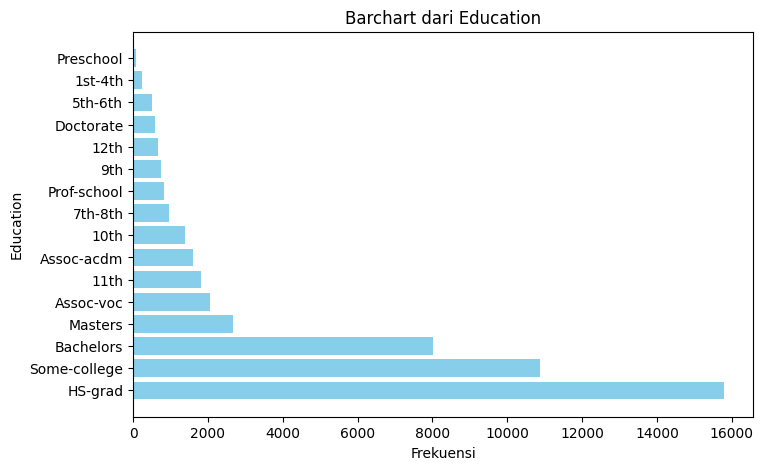

In [92]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(8,5))

#hitung frekuensi tiap kategori education
education_counts = df['education'].value_counts()

#buat barchart
plt.barh(education_counts.index, education_counts.values, color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Education')
plt.title('Barchart dari Education')
plt.show()


/tmp/ipython-input-2407066452.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(income_group, labels=['<=50K', '>50K'])


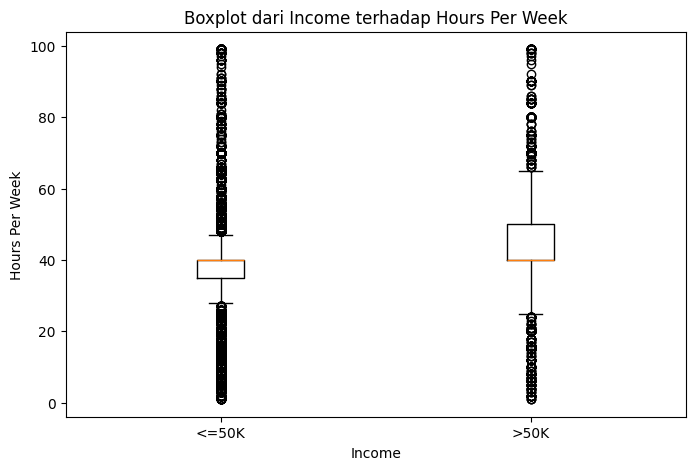

In [97]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(8,5))

#Kelompokkan berdasarkan income
income_group = [df.loc[df['income'] == '<=50K', 'hours-per-week'], df.loc[df['income'] == '>50K', 'hours-per-week']]

#buat boxplot
plt.boxplot(income_group, labels=['<=50K', '>50K'])
plt.title('Boxplot dari Income terhadap Hours Per Week')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.show()

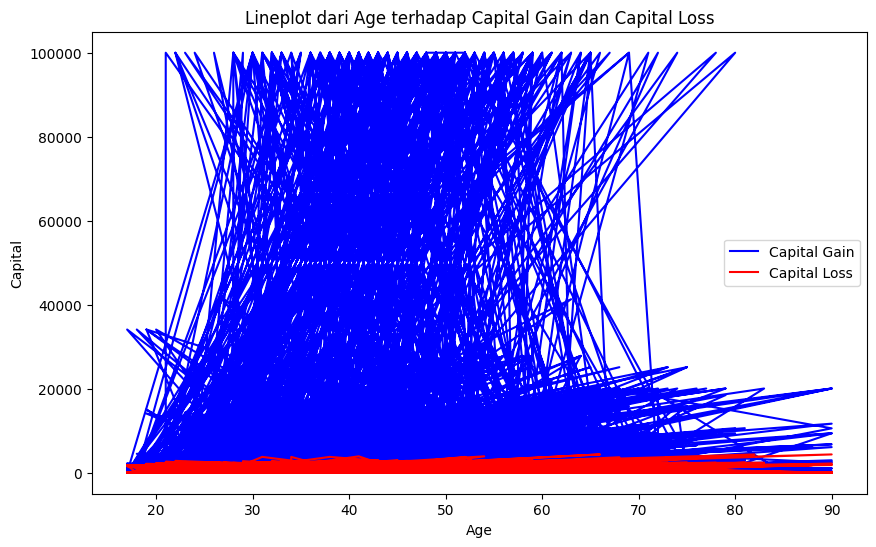

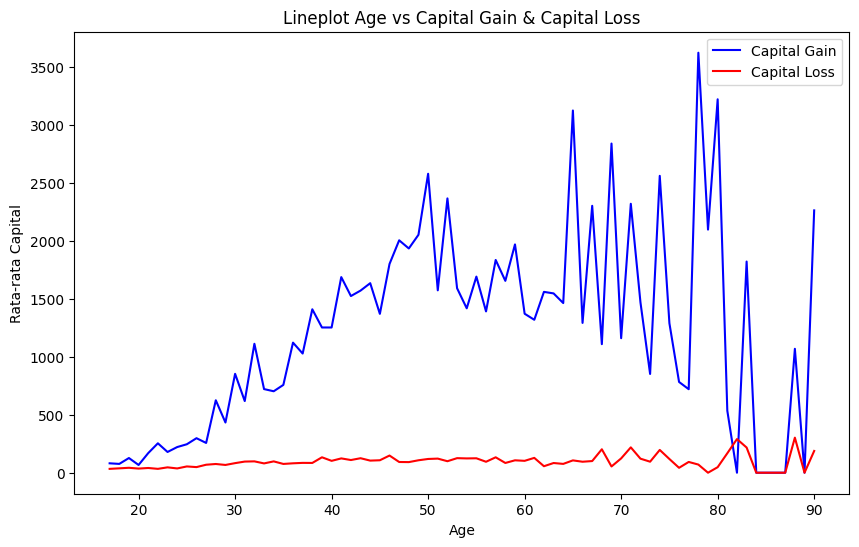

In [100]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(10,6))

#buat garis capital gain
plt.plot(df['age'], df['capital-gain'], color='blue', label='Capital Gain')

#buat garis capital loss
plt.plot(df['age'], df['capital-loss'], color='red', label='Capital Loss')

#buat Lineplot
plt.title('Lineplot dari Age terhadap Capital Gain dan Capital Loss')
plt.xlabel('Age')
plt.ylabel('Capital')
plt.legend()
plt.show()


#Karena Line plot diatas menghubungkan data satu persatu, maka solusinya agar lineplot terlihat lebih rapi maka hitung rata rata capital per umur
age_group = df.groupby('age')[['capital-gain', 'capital-loss']].mean()

# Plot lineplot
plt.figure(figsize=(10,6))
plt.plot(age_group.index, age_group['capital-gain'], label='Capital Gain', color='blue')
plt.plot(age_group.index, age_group['capital-loss'], label='Capital Loss', color='red')
plt.title("Lineplot Age vs Capital Gain & Capital Loss")
plt.xlabel("Age")
plt.ylabel("Rata-rata Capital")
plt.legend()
plt.show()

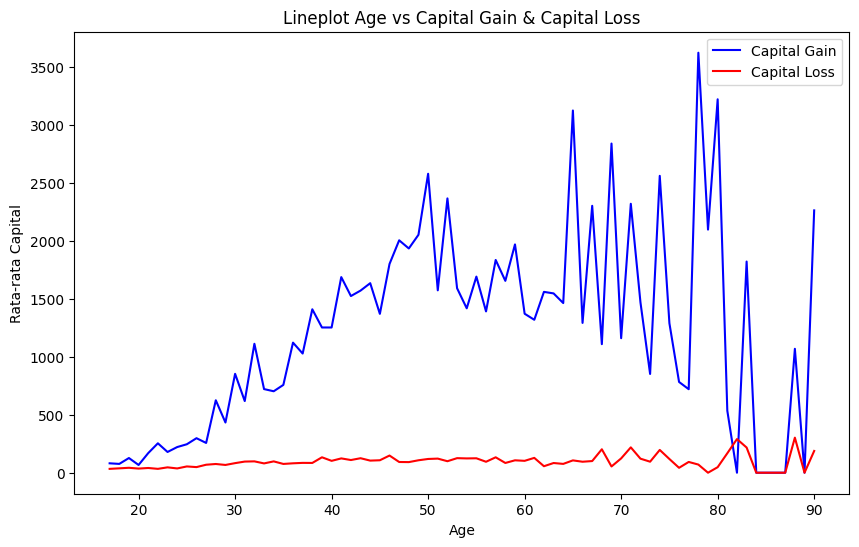

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [112]:
#jawab dengan komentar python
'''
1. Usia paling banyak berada di 20-40 tahun, dan distribusinya miring kekanan (rigth-skewed) dengan artian lebih banyak orang muda daripada orang tua.
2. Jika terdapat data hilang dapat digunakan median untuk menggantikan data yang hilang, karena median tidak mempengaruhi nilai ekstrim.
'''


'\n1. Usia paling banyak berada di 20-40 tahun, dan distribusinya miring kekanan (rigth-skewed) dengan artian lebih banyak orang muda daripada orang tua.\n2. Jika terdapat data hilang dapat digunakan median untuk menggantikan data yang hilang, karena median tidak mempengaruhi nilai ekstrim.\n'

In [113]:
# NOMOR 3
#Jumlah outlier pada setiap kategori income terkait hours per week
outlier_count = {}

#Hitung outlier
for income_category in df['income'].unique():
  #ambil data sesuai kategori
  subset = df[df['income'] == income_category]['hours-per-week']

  # Hitung Q1, Q3 dan IQR
  Q1 = subset.quantile(0.25)
  Q3 = subset.quantile(0.75)
  IQR = Q3 - Q1

  #batas bawah dan atas untuk deteksi outlier
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # cari outlier
  outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

  #hitung jumlah outlier
  outlier_count[income_category] = len(outliers)

#tampilkan hasil outlier per kategori
print("Jumlah outlier per kategori income:", outlier_count)

#cari kategori income dengan outlier terbanyak
print("Kategori income dengan outlier terbanyak:", max(outlier_count, key=outlier_count.get))

Jumlah outlier per kategori income: {'<=50K': 11706, '>50K': 781}
Kategori income dengan outlier terbanyak: <=50K


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [115]:
#import
from sklearn.preprocessing import LabelEncoder

In [116]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Encode sex
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

# Encode income
le_income = LabelEncoder()
df['income'] = le_income.fit_transform(df['income'])

# Cek hasil
print(df[['sex', 'income']].head())


   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


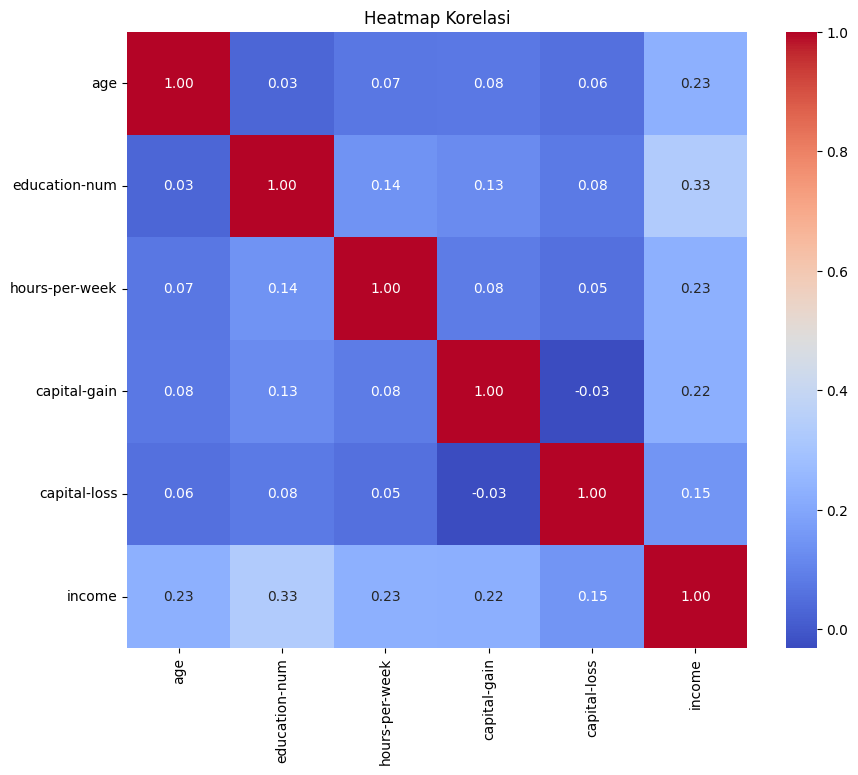

In [135]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import seaborn as sns

# lakukan analisis korelasi pada variable numerik dan target income
kol_corr = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

# hitung korelasi
corr_matrix = df[kol_corr].corr()

# tampilkan hasil korelasi
print(corr_matrix)

# Tampilkan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [118]:
# Hasil analisis jelaskan pada cell ini

# Hasil analisis menunjukkan bahwa pendidikan (education-num) memiliki korelasi terkuat dengan pendapatan (r = 0.33), dengan artian semakin tinggi pendidikan seseorang maka semakin besar mendapatkan income > 50K.
# Variabel lain yang juga cukup berhubungan adalah usia (r = 0.23), jam kerja per minggu (r = 0.23), dan capital-gain (r = 0.22).
# Sementara itu, capital-loss hanya memiliki korelasi kecil (r = 0.15) dengan pendapatan.

# Dari data tersebut dapat disimpilkan bahwa faktor utama yang mempengaruhi income adalah pendidikan diikui dengan usia, jam kerja, dan capital gain. Sedangkan capital-loss rendah.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [126]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


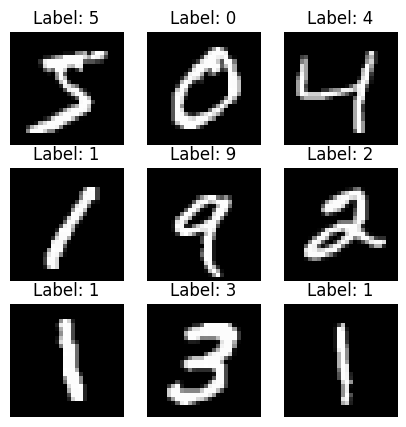

In [127]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [128]:
# import
import cv2 as cv

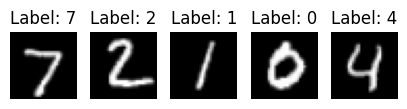

In [129]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_resized = np.zeros((X_test.shape[0], 32, 32))

#Resize menggunakan cv2
for i in range(X_test.shape[0]):
  X_test_resized[i] = cv.resize(X_test[i], (32, 32))

#tampilkan
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [133]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Lakukan normalisasi nilai citra (bagi 255 agar nilai piksel jadi 0-1)
x_test_normalized = X_test_resized / 255.0

# Tampilkan contoh hasil normalisasi
print("Nilai setelah normalisasi: ", x_test_normalized[0, :2 :2])

Nilai setelah normalisasi:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [134]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Mengubah matriks 32*32 menjadi vektor 2D
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1 )

# Output sebelum dan sesudah
print("Shape sebelum flatten:", x_test_normalized.shape)
print("Shape sesudah flatten:", x_test_flat.shape)

Shape sebelum flatten: (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
